<a href="https://colab.research.google.com/github/aagusw/Phd-Research-Update/blob/main/Lidar_Tiles_DSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

In [2]:
pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.6 MB/s eta 0:00:00


In [3]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.9 MB/s eta 0:00:00


In [4]:
pip install Pillow

In [5]:
pip install netcdf

  Preparing metadata (setup.py) ... done
  Created wheel for netcdf: filename=netcdf-66.0.2-py3-none-any.whl size=1140 sha256=19ece9253082f140303c69947ae5f33136ea6fdba5f95cad1033c84dc3bc342e
  Stored in directory: /root/.cache/pip/wheels/13/2e/52/ae430c0aa0f273d39a049a1ae9b7ff7df726f45b4d3bf58548
Successfully built netcdf


In [6]:
pip install lidario

  Preparing metadata (setup.py) ... done
  Created wheel for lidario: filename=lidario-0.3.0-py3-none-any.whl size=8001 sha256=2423ce1b7b0d58857816feb9594e55af1025aef80b7bad309a2049e1a9e32376
  Stored in directory: /root/.cache/pip/wheels/70/1e/4e/76bdfc04d0b761169a319de87cbf4f4c88dc28426f25915f46
Successfully built lidario


In [7]:
pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbf

In [8]:
from scipy.io import netcdf
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import lidario as lio
import open3d as o3d

In [9]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
# et.data.get_data("")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [11]:
# Read the data in and call it lidar_dtm (this is the variable name)
lidar_dtm = rxr.open_rasterio('/content/DSM_D0214256_20191126_20191127.tif', masked=True)

In [12]:
!pip install Pillow

In [14]:
from PIL import Image

# Replace 'your_image.tif' with the path to your TIF file
file_path = '/content/DSM_D0214256_20191126_20191127.tif'

# Open the TIF file
image = Image.open(file_path)

# Display the image
image.show()

In [15]:
# Create a path to file
lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "/content/TA12se_FZ_DSM_1m.tif")
lidar_dsm_path

'/content/TA12se_FZ_DSM_1m.tif'

In [17]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dsm = rxr.open_rasterio('/content/DSM_D0214256_20191126_20191127.tif', masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dsm

<xarray.DataArray (band: 1, y: 2000, x: 2000)>
[4000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.16e+05 5.16e+05 5.16e+05 ... 5.18e+05 5.18e+05
  * y            (y) float64 4.26e+05 4.26e+05 4.26e+05 ... 4.24e+05 4.24e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    STATISTICS_MAXIMUM:  33.382999420166
    STATISTICS_MEAN:     0.40770836764907
    STATISTICS_MINIMUM:  -3.0069999694824
    STATISTICS_STDDEV:   3.955478045761
    scale_factor:        1.0
    add_offset:          0.0

In [18]:
type(lidar_dsm)

xarray.core.dataarray.DataArray

In [19]:
# View the min and max values of the array
print(lidar_dsm.min(), lidar_dsm.max())

<xarray.DataArray ()>
array(-3.007, dtype=float32)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(33.383, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [20]:
# View the dimensions of the array (rows, columns)
lidar_dsm.shape

(1, 2000, 2000)

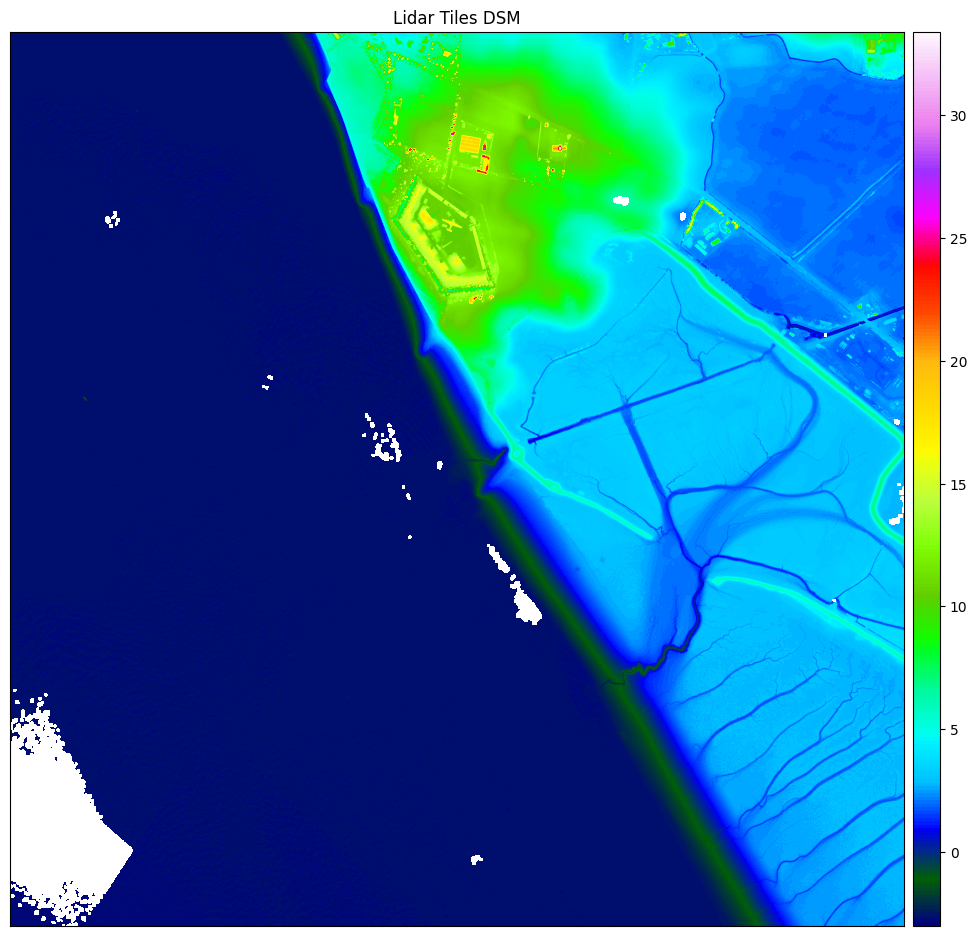

In [22]:
ep.plot_bands(lidar_dsm,
              scale=False,
              cmap='gist_ncar',
              title="Lidar Tiles DSM")
plt.show()

In [23]:
# Translate a raster to a numpy point cloud.
translator = lio.Translator("geotiff", "np")
point_cloud = translator.translate("/content/DSM_D0214256_20191126_20191127.tif")
pc = point_cloud

# point_cloud: np.array([...])

In [24]:
pc

array([[ 5.16000500e+05,  4.25999500e+05, -2.66000009e+00],
       [ 5.16001500e+05,  4.25999500e+05, -2.60599995e+00],
       [ 5.16002500e+05,  4.25999500e+05, -2.61800003e+00],
       ...,
       [ 5.17997500e+05,  4.24000500e+05,  2.65000010e+00],
       [ 5.17998500e+05,  4.24000500e+05,  2.65300012e+00],
       [ 5.17999500e+05,  4.24000500e+05,  2.50900006e+00]])

In [25]:
# Sample array
arr = np.array([pc])

# Save array to a binary file
np.save('array_data.npy', arr)

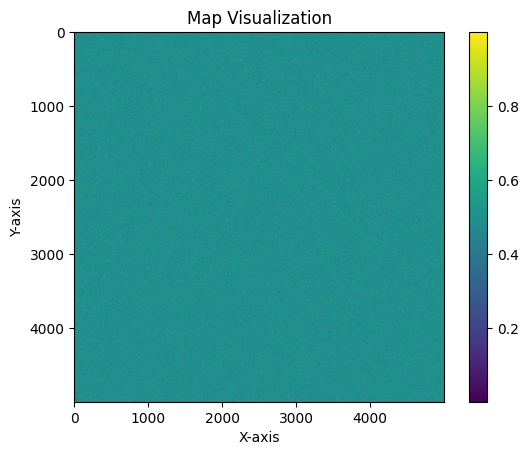

In [26]:
# Sample array representing a map (replace this with your data)
map_data = np.random.rand(5000, 5000)  # Replace with your map array

# Plot the map using Matplotlib
plt.imshow(map_data, cmap='viridis')  # Choose a colormap ('viridis', 'gray', 'jet', etc.)
plt.colorbar()  # Add a color bar for reference
plt.title('Map Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [27]:
!pip install rasterio

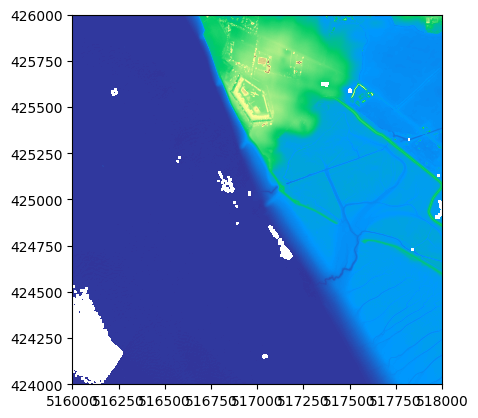

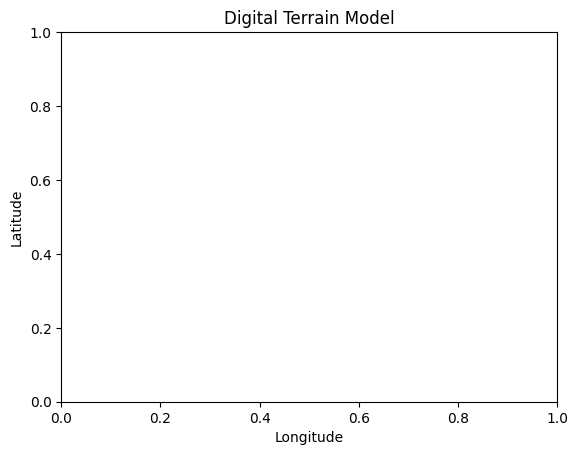

In [29]:
import rasterio
from rasterio.plot import show

# Path to your DTM file (replace 'your_dtm_file.tif' with your file path)
dtm_file_path = '/content/DSM_D0214256_20191126_20191127.tif'

# Open the DTM file using rasterio
dtm_dataset = rasterio.open(dtm_file_path)

# Display the DTM using matplotlib
show(dtm_dataset, cmap='terrain')  # Use 'terrain' colormap or choose another colormap

# Add title and labels
plt.title('Digital Terrain Model')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

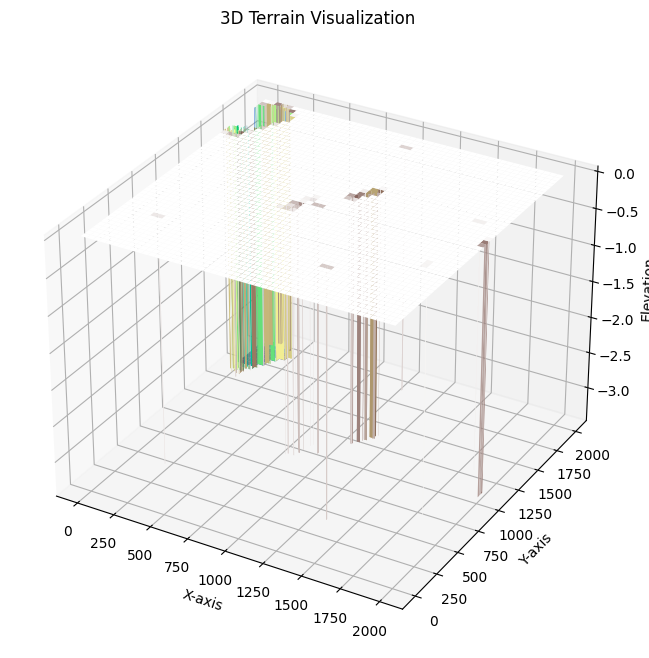

In [33]:
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to your DTM file (replace 'your_dtm_file.tif' with your file path)
dtm_file_path = '/content/DSM_D0214256_20191126_20191127.tif'

# Open the DTM file using rasterio
dtm_dataset = rasterio.open(dtm_file_path)

# Read the terrain elevation data
elevation = dtm_dataset.read(1)  # Assuming the elevation is stored in the first band

# Create a meshgrid for 3D plotting
x_size, y_size = dtm_dataset.width, dtm_dataset.height
x = range(x_size)
y = range(y_size)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the terrain in 3D
ax.plot_surface(X, Y, elevation, cmap='terrain')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Elevation')
ax.set_title('3D Terrain Visualization')

plt.show()

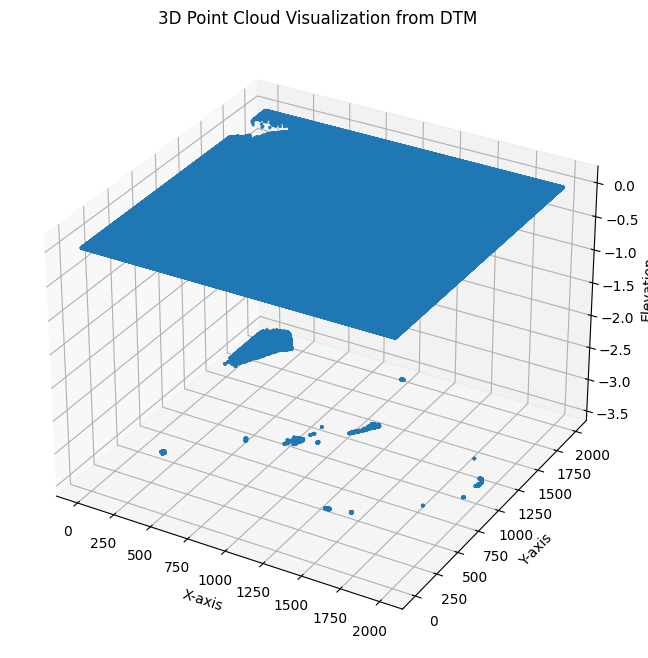

In [34]:
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Path to your DTM file (replace 'your_dtm_file.tif' with your file path)
dtm_file_path = '/content/DSM_D0214256_20191126_20191127.tif'

# Open the DTM file using rasterio
dtm_dataset = rasterio.open(dtm_file_path)

# Read the terrain elevation data
elevation = dtm_dataset.read(1)  # Assuming the elevation is stored in the first band

# Get the shape of the elevation data
x_size, y_size = dtm_dataset.width, dtm_dataset.height

# Create X, Y grids
X, Y = np.meshgrid(np.arange(x_size), np.arange(y_size))

# Flatten X, Y, and elevation arrays for point cloud plotting
X_flat = X.flatten()
Y_flat = Y.flatten()
elevation_flat = elevation.flatten()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(X_flat, Y_flat, elevation_flat, s = 2)  # Adjust s for point size

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Elevation')
ax.set_title('3D Point Cloud Visualization from DTM')

plt.show()